In [1]:
import py3Dmol

view = py3Dmol.view(query='pdb:6W9C') # A trimer of the SARS CoV1 PLpro 
view.setStyle({'chain':'A'},{'cartoon':{'color':'spectrum'}}) # highlight cahin A with cartoon representation
view.addSurface(py3Dmol.VDW,{'opacity':0.7,'color':'white'}, {'chain':'A'}) # Add a vanderwaals surface
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [2]:
import pandas as pd 

data = pd.read_csv('coronavirus_data/data/PLpro.csv')
print(len(data))
data.head()

233891


,smiles,activity
0,C[C@@H]1CN(C(=O)C2=C(C=CC(=C2)NC(=O)NC3=CC=CC4...,1
1,C/C(=N\NC(=S)N)/CC(C1=CC=CC=C1)C2=C(C3=CC=CC=C...,1
2,C1CCC2=C3C(=NN(C3=O)C4=CC=CC=C4)N=C(N2CC1)SCC(...,1
3,CCCCCC(=O)N/N=C(\C)/C1=CC=C(C=C1)N2CCCCC2,1
4,CC(=O)NC(C1=C(C2=C(C=CC=N2)C=C1)O)C3=CC=CO3,1


In [3]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import time


start_timer = time.time()
data['scaffolds'] = data['smiles'].apply(MurckoScaffold.MurckoScaffoldSmilesFromSmiles)
stop_timer = time.time()

print(f'{round(stop_timer - start_timer)} s to apply function to {len(data)} cells    \n\n') #\n means new line

data.head()

RDKit WARNING: [11:20:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:20:40] WARNING: not removing hydrogen atom without neighbors


97 s to apply function to 233891 cells    




,smiles,activity,scaffolds
0,C[C@@H]1CN(C(=O)C2=C(C=CC(=C2)NC(=O)NC3=CC=CC4...,1,O=C(Nc1ccc2c(c1)C(=O)NCCC(CNS(=O)(=O)c1ccccc1)...
1,C/C(=N\NC(=S)N)/CC(C1=CC=CC=C1)C2=C(C3=CC=CC=C...,1,O=c1oc2ccccc2cc1Cc1ccccc1
2,C1CCC2=C3C(=NN(C3=O)C4=CC=CC=C4)N=C(N2CC1)SCC(...,1,O=C(CSc1nc2nn(-c3ccccc3)c(=O)c-2c2n1CCCCC2)c1c...
3,CCCCCC(=O)N/N=C(\C)/C1=CC=C(C=C1)N2CCCCC2,1,c1ccc(N2CCCCC2)cc1
4,CC(=O)NC(C1=C(C2=C(C=CC=N2)C=C1)O)C3=CC=CO3,1,c1coc(Cc2ccc3cccnc3c2)c1


,Structure,Scaffold Structure,activity
0,,,1
1,,,1
2,,,1
3,,,1
4,,,1
5,,,1
6,,,1
7,,,1
8,,,1
9,,,1

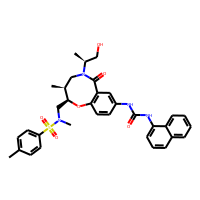
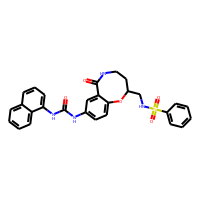
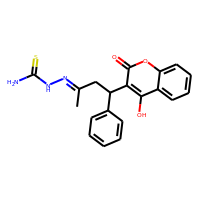
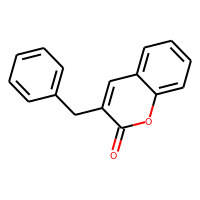
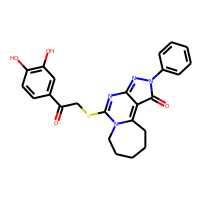
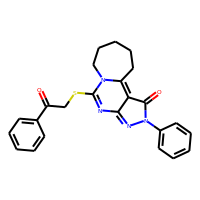
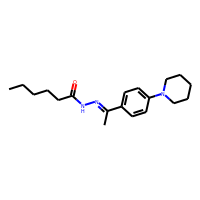
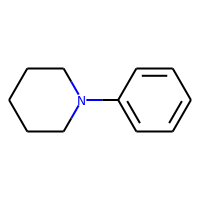
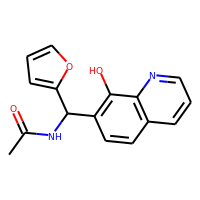
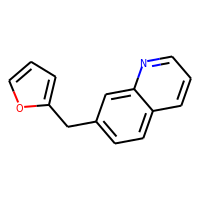
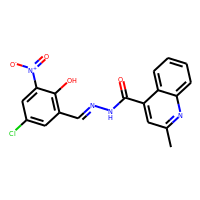
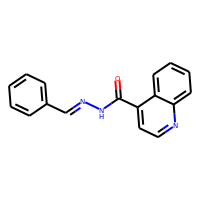
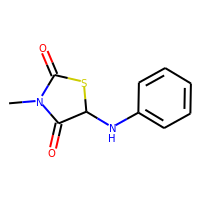
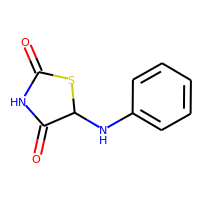
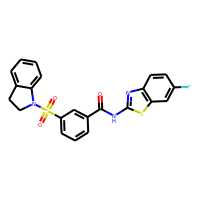
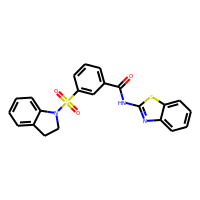
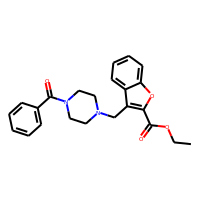
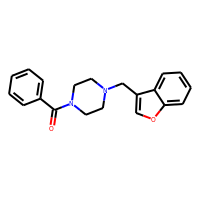
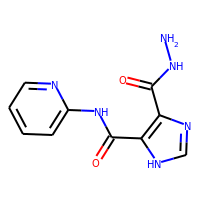
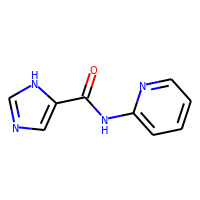
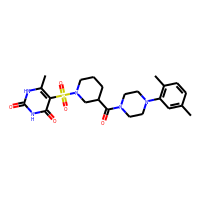
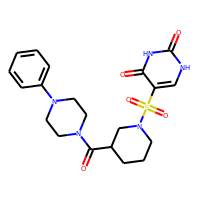

In [4]:
from rdkit.Chem import PandasTools

df = data.loc[:100,:].copy()
PandasTools.AddMoleculeColumnToFrame(frame = df,smilesCol='smiles',molCol='Structure')
PandasTools.AddMoleculeColumnToFrame(frame = df,smilesCol='scaffolds',molCol='Scaffold Structure')
df.loc[0:10,['Structure','Scaffold Structure','activity']]

In [ ]:
scaffold_counts = data['scaffolds'].value_counts()


topScaffolds = scaffold_counts.reset_index() 
topScaffolds.columns = ['scaffold smiles', 'count']
PandasTools.AddMoleculeColumnToFrame(frame = topScaffolds,smilesCol='scaffold smiles',molCol='Structure')
topScaffolds.loc[0:10,:]

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (15,5))
plt.hist(topScaffolds['count'], bins=100, alpha = 0.8)
plt.title('Hisogram of Fragment occurence counts')
plt.xlabel('Fragment Count')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [ ]:
scaffolds_to_use = topScaffolds.loc[topScaffolds['count'] >1]['scaffold smiles']
compounds_of_interest = data.loc[data['scaffolds'].isin(scaffolds_to_use),:]
print(f'Number of compounds in set = {len(compounds_of_interest)} \n\n')
compounds_of_interest.head()

In [ ]:
plt.bar(x = ['Misses','Hits'],
        height = compounds_of_interest['activity'].value_counts())
plt.title('Count of Hits and Misses in selected dataset')
plt.ylabel('Count')
plt.show()

In [ ]:
def UnderSample(data):
    hits = data.loc[data['activity'] == 1]
    undersampled_mised = data.loc[data['activity'] ==0].sample(len(hits))

    UndersampledDf = hits.append(undersampled_mised)
    return UndersampledDf
    

data_for_model = UnderSample(data)


plt.bar(x = ['Misses','Hits'],
        height = data_for_model['activity'].value_counts())
plt.title('Count of Hits and Misses in Undersampled dataset')
plt.ylabel('Count')
plt.show()

In [ ]:
from rdkit.Chem import Fragments
from rdkit.Chem import AllChem, Crippen

hand_crafted_features = ['NC(=S)N', 'NC(=O)','[N+](=O)[O-]']

def SubstructureMatch(smiles, list_of_substructures):
    mol = Chem.MolFromSmiles(smiles)
    features = [Chem.MolFromSmiles(i) for i in list_of_substructures]
    matches = [int(mol.HasSubstructMatch(i)) for i in features]
    dictionary = dict(zip(list_of_substructures, matches))
    return dictionary


def RDKitBagOfFeatures(smiles):
    mol = Chem.MolFromSmiles(smiles)
    frag_fns = dict(Fragments.fns) 
    frag_matches = dict(zip(frag_fns.keys(), 
                     [i(mol) for i in frag_fns.values()]))

    return frag_matches


def PhysChemFeatures(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    dictionary = {'MolWT':AllChem.CalcExactMolWt(mol),
                  'LogP':Chem.Crippen.MolLogP(mol),
                  'HBondDonors': AllChem.CalcNumLipinskiHBD(mol),
                  'HBondAcceptors': AllChem.CalcNumLipinskiHBA(mol),
                  'NumAromaticRings': AllChem.CalcNumAromaticRings(mol),
                  'NumAromaticHeterocycles': AllChem.CalcNumAromaticHeterocycles(mol),
                  'NumHeteroCycles':AllChem.CalcNumHeterocycles(mol)}
    return dictionary

SubstructureMatch('C1=CC=C(C=C1)/C=N/NC(=S)N', hand_crafted_features) # example/test

In [ ]:
rdkit_Fragments = pd.DataFrame(compounds_of_interest['smiles'].apply(RDKitBagOfFeatures).to_list())
our_Fragments = pd.DataFrame(data_for_model['smiles'].apply(SubstructureMatch, args = [hand_crafted_features]).to_list())
pyhyschem_descriptors = pd.DataFrame(data_for_model['smiles'].apply(PhysChemFeatures).to_list())


all_features = pd.concat(objs = [rdkit_Fragments, our_Fragments, pyhyschem_descriptors], 
                         axis = 1,
                         join = 'inner') 
all_features.head()

In [ ]:
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split

classifier = tree.DecisionTreeClassifier(max_depth=50,
                                        max_leaf_nodes=20)


x_train,x_test, y_train, y_test = train_test_split(pyhyschem_descriptors.loc[:,['LogP',
                                                                          'NumAromaticRings']],
                                                   data_for_model['activity'],
                                                   test_size=0.2)

classifier.fit(x_train,y_train)

tree_data = tree.export_graphviz(classifier, 
                                 out_file = None,
                                 feature_names = ['LogP','NumAromaticRings'],
                                class_names=['Miss','Hit'],
                                rotate=True)
graph = graphviz.Source(tree_data)

graph

In [49]:
# Single tree and evaluation

classifier = tree.DecisionTreeClassifier()

x_train,x_test, y_train, y_test = train_test_split(all_features,
                                                   data_for_model['activity'],
                                                   test_size=0.2)

start = time.time()
classifier.fit(x_train, y_train)
end = time.time()
print(f'Time taken to train: {end - start} s')

Time taken to train: 0.02430438995361328 s


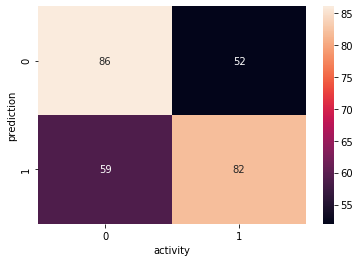

In [52]:
import seaborn as sns

predictions = classifier.predict(x_test)
confusion_matrix = pd.crosstab(predictions, y_test)


sns.heatmap(confusion_matrix, annot=True)
plt.ylabel('prediction')
plt.show()

ROC_AUC = 0.603


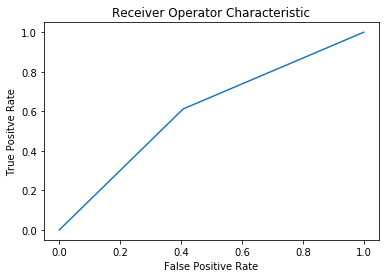

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)

roc_auc = roc_auc_score(y_test, predictions)
print(f'ROC_AUC = {round(roc_auc,3)}')

plt.plot(false_positive_rate, true_positive_rate)
plt.title('Receiver Operator Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.show()

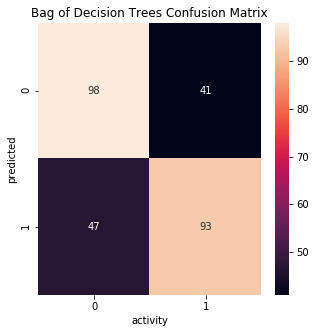

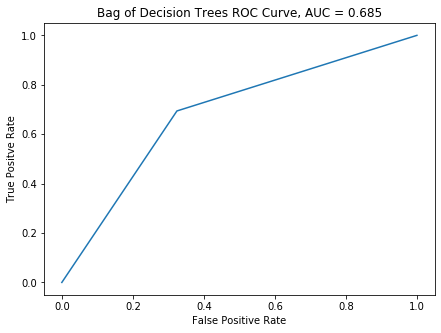

In [65]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


ensemble_classifier = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),
                                        n_estimators = 500) # use any estimator


ensemble_classifier.fit(x_train, y_train)
predictions_ens = ensemble_classifier.predict(x_test)

confusion_matrix_ens = pd.crosstab(predictions_ens, y_test)
plt.figure(figsize=(5,5))
plt.title('Bag of Decision Trees Confusion Matrix')
sns.heatmap(confusion_matrix_ens, annot=True)
plt.ylabel('predicted')
plt.show()




plt.figure(figsize = (7,5))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_ens)
plt.plot(false_positive_rate, true_positive_rate)
roc_auc = roc_auc_score(y_test, predictions_ens)
plt.title(f'Bag of Decision Trees ROC Curve, AUC = {round(roc_auc, 3)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.show()

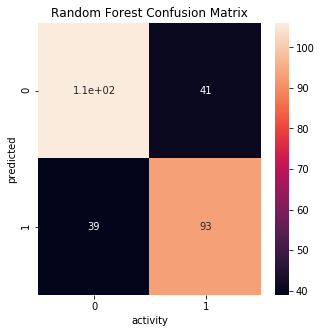

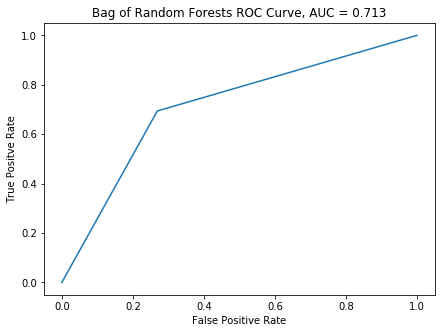

In [66]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
predictions_rf = rf.predict(x_test)

confusion_matrix_rf = pd.crosstab(predictions_rf, y_test)
plt.figure(figsize=(5,5))
plt.title('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix_rf, annot=True)
plt.ylabel('predicted')
plt.show()


plt.figure(figsize = (7,5))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_rf)
plt.plot(false_positive_rate, true_positive_rate)
roc_auc = roc_auc_score(y_test, predictions_rf)
plt.title(f'Bag of Random Forests ROC Curve, AUC = {round(roc_auc,3)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.show()

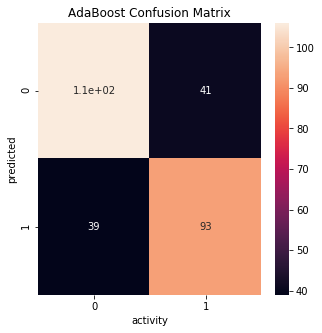

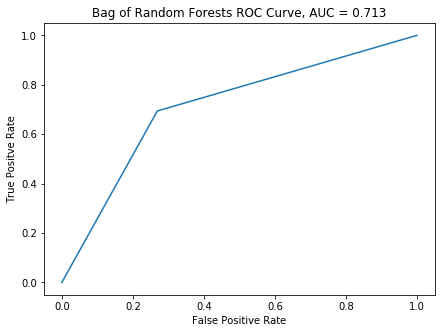

In [68]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(),
                             n_estimators=500)

adaboost.fit(x_train, y_train)

predictions_adaboost = adaboost.predict(x_test)

confusion_matrix_adaboost = pd.crosstab(predictions_adaboost, y_test)
plt.figure(figsize=(5,5))
plt.title('AdaBoost Confusion Matrix')
sns.heatmap(confusion_matrix_adaboost, annot=True)
plt.ylabel('predicted')
plt.show()


plt.figure(figsize = (7,5))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_adaboost)
plt.plot(false_positive_rate, true_positive_rate)
roc_auc = roc_auc_score(y_test, predictions_adaboost)
plt.title(f'Bag of Random Forests ROC Curve, AUC = {round(roc_auc,3)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.show()

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(all_features,
                                                   data_for_model['activity'],
                                                   test_size=0.2)

